In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
model=tf.keras.models.load_model("cnn_model")

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [6]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    "testing",
    image_size = (200,200),
    batch_size = 20,
)

Found 20 files belonging to 2 classes.


In [7]:
cls=[0,1]

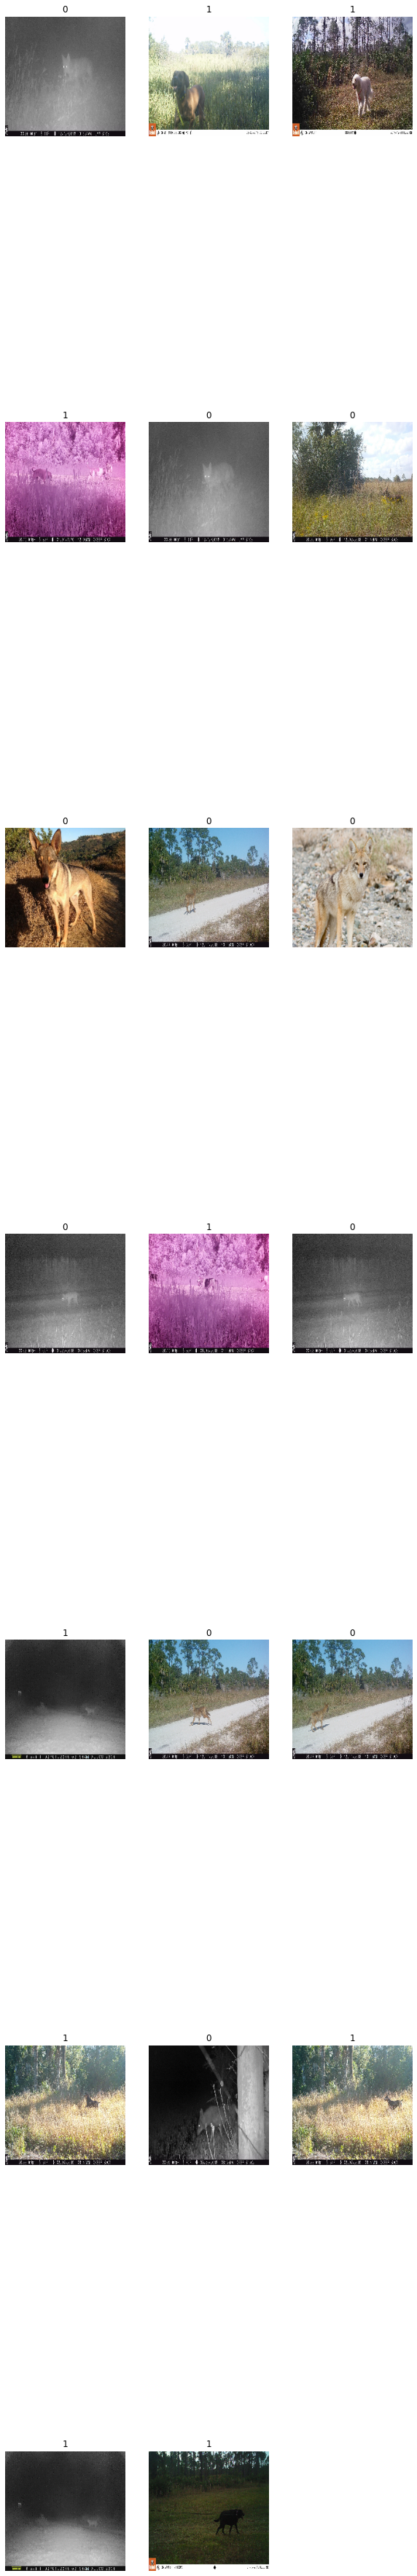

In [13]:
plt.figure(figsize=(10,70))
for images, labels in test_ds.take(1):
  for i in range(20):
    ax = plt.subplot(7, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(cls[labels[i]])
    plt.axis("off")

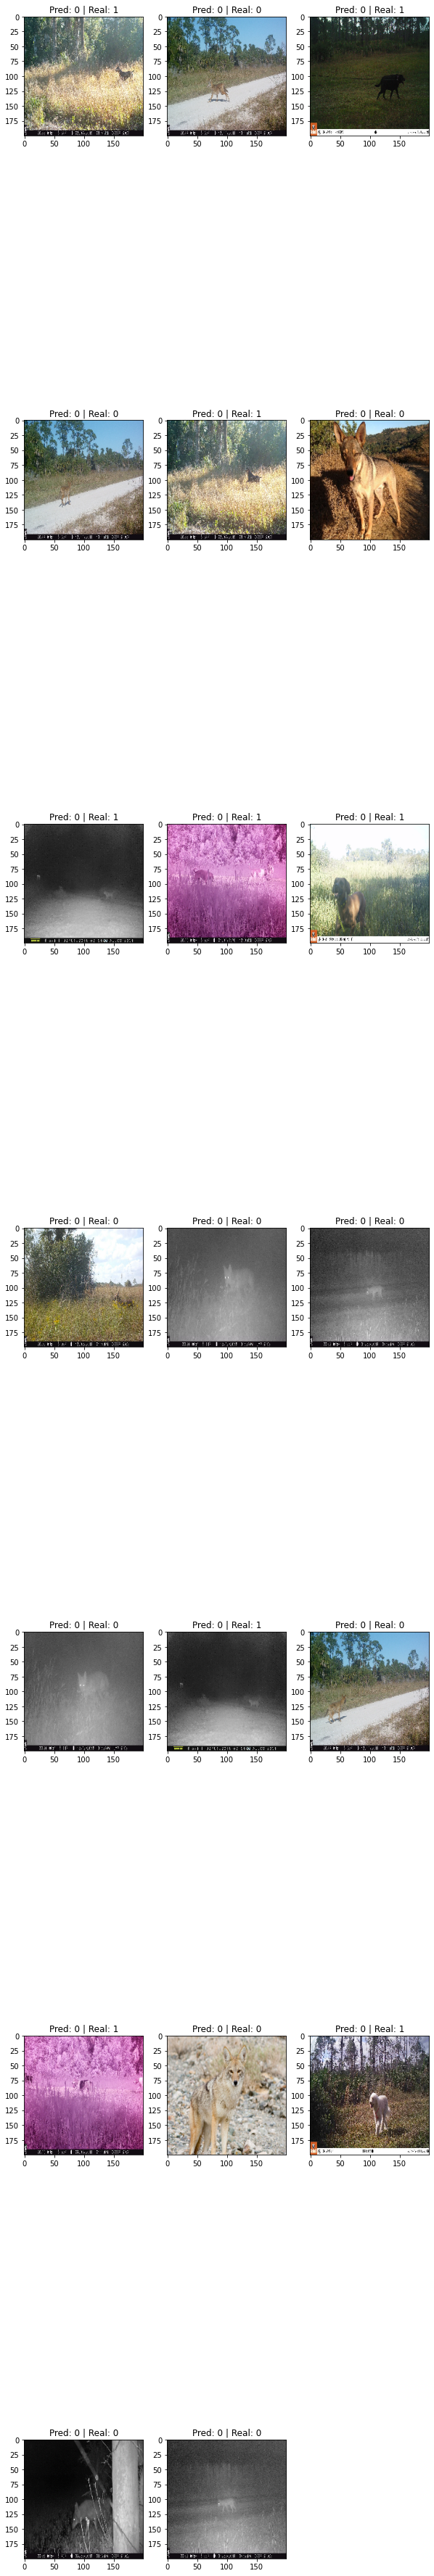

In [17]:
import numpy

plt.figure(figsize=(10,70))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(20):
    ax = plt.subplot(7, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + str(cls[index]) + " | Real: " + str(cls[labels[i]]))